# Pickups

Pickups define relationships between the components of a lens. For instance, in a singlet lens, the radii of curvature can be constrained to be equal in magnitude but opposite in sign.

In [1]:
import numpy as np

from optiland import optic, optimization

Define a starting lens:

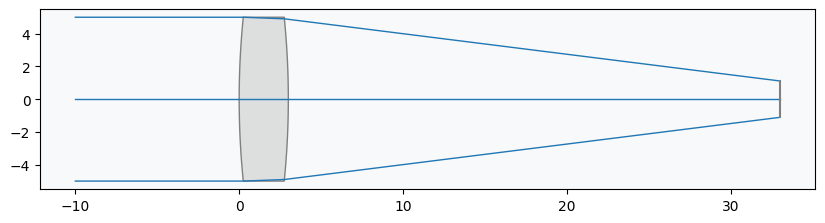

In [2]:
lens = optic.Optic()

# add surfaces
lens.add_surface(index=0, radius=np.inf, thickness=np.inf)
lens.add_surface(index=1, radius=50, thickness=3, material="SK16", is_stop=True)
lens.add_surface(index=2, radius=-50, thickness=30)
lens.add_surface(index=3)

# set aperture
lens.set_aperture(aperture_type="EPD", value=10)

# set fields
lens.set_field_type(field_type="angle")
lens.add_field(y=0)

# set wavelengths
lens.add_wavelength(value=0.48)
lens.add_wavelength(value=0.55, is_primary=True)
lens.add_wavelength(value=0.65)

lens.draw()

Define pickups:

In [ ]:
lens.pickups.add(
    source_surface_idx=1,
    attr_type="radius",
    target_surface_idx=2,
    scale=-1,
    offset=0,
)

Define optimization problem:

In [4]:
problem = optimization.OptimizationProblem()

Add operands (targets for optimization):

In [ ]:
"""
Add a wavefront error operand for all wavelengths.

Use Gaussian quadrature distribution for the rays (see distribution documentation for
more information).
"""

for wave in lens.wavelengths.get_wavelengths():
    input_data = {
        "optic": lens,
        "Hx": 0,
        "Hy": 0,
        "num_rays": 3,
        "wavelength": wave,
        "distribution": "gaussian_quad",
    }
    problem.add_operand(
        operand_type="OPD_difference",
        target=0,
        weight=1,
        input_data=input_data,
    )

Define variables - let first radius of curvature vary (the second surface will match this value, but with opposite sign):

In [6]:
problem.add_variable(lens, "radius", surface_number=1)

Check initial merit function value and system properties:

In [7]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │                3879.67 │                 0 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════╤═════════╤═════════╤════════════════════╕
│    │ Operand Type   │   Target │   Weight │   Value │   Delta │   Contribution (%) │
╞════╪════════════════╪══════════╪══════════╪═════════╪═════════╪════════════════════╡
│  0 │ OPD difference │        0 │        1 │ 40.0587 │ 40.0587 │            41.3618 │
│  1 │ OPD difference │        0 │        1 │ 36.0072 │ 36.0072 │            33.4184 │
│  2 │ OPD difference │        0 │        1 │ 31.2801 │ 31.2801 │            25.2198 │
╘════╧════════════════╧══════════╧══════════╧═════════╧═════════╧════════════════════╛
╒════╤═════════════════╤═══════════╤═════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │   Value │ Min. Bo

Define optimizer:

In [8]:
optimizer = optimization.OptimizerGeneric(problem)

Run optimization:

In [9]:
optimizer.optimize()

  message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  success: True
   status: 0
      fun: 7.40021876171174
        x: [-6.131e-01]
      nit: 9
      jac: [ 2.496e+02]
     nfev: 58
     njev: 29
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>

Print merit function value and system properties after optimization:

In [10]:
problem.info()

╒════╤════════════════════════╤═══════════════════╕
│    │   Merit Function Value │   Improvement (%) │
╞════╪════════════════════════╪═══════════════════╡
│  0 │                7.40022 │           99.8093 │
╘════╧════════════════════════╧═══════════════════╛
╒════╤════════════════╤══════════╤══════════╤══════════╤══════════╤════════════════════╕
│    │ Operand Type   │   Target │   Weight │    Value │    Delta │   Contribution (%) │
╞════╪════════════════╪══════════╪══════════╪══════════╪══════════╪════════════════════╡
│  0 │ OPD difference │        0 │        1 │ 1.81071  │ 1.81071  │            44.3049 │
│  1 │ OPD difference │        0 │        1 │ 0.899126 │ 0.899126 │            10.9244 │
│  2 │ OPD difference │        0 │        1 │ 1.8202   │ 1.8202   │            44.7707 │
╘════╧════════════════╧══════════╧══════════╧══════════╧══════════╧════════════════════╛
╒════╤═════════════════╤═══════════╤═════════╤══════════════╤══════════════╕
│    │ Variable Type   │   Surface │   V

Draw final lens:

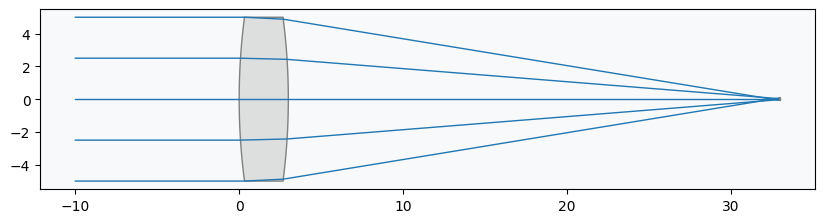

In [11]:
lens.draw(num_rays=5)

Confirm that the radii of curvature are equal and opposite:

In [12]:
lens.info()

╒════╤═════════════════╤══════════╤═════════════╤════════════╤═════════╤═════════════════╕
│    │ Type            │   Radius │   Thickness │ Material   │   Conic │   Semi-aperture │
╞════╪═════════════════╪══════════╪═════════════╪════════════╪═════════╪═════════════════╡
│  0 │ Planar          │ inf      │         inf │ Air        │       0 │        5        │
│  1 │ Stop - Standard │  38.6889 │           3 │ SK16       │       0 │        5        │
│  2 │ Standard        │ -38.6889 │          30 │ Air        │       0 │        4.85123  │
│  3 │ Planar          │ inf      │         nan │ Air        │       0 │        0.095248 │
╘════╧═════════════════╧══════════╧═════════════╧════════════╧═════════╧═════════════════╛
